# **Affects of Barge Movements on the Environment**

By Madeline Nellis and Caroline Casella

[Github Repository Link](https://github.com/madelinenellis/madelinenellis.github.io.git)


# Introduction #

This project is a collaboration between Caroline Casella and Madeline Nellis for our Data Science class with Aron Culotta. We will be examining how the rates of barge movements down the Mississippi river affect the air quality, water quality, effect on wildlife, and the sinking of New Orleans.

# Housekeeping

In [ ]:
# first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Data-Science-Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Data-Science-Project


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Examining Barge Movements
The first step needed is to read the dataset into a dataframe. Once the data has been read, we will clean it to prepare it for analysis and add any other data that we deem important.



 ### Reading the Data
The barge data was collected by the United States Department of Agriculture. 

Website: https://agtransport.usda.gov/Barge/Downbound-Barge-Grain-Movements-Tons-/n4pw-9ygw


In [ ]:
# Read in Barge Movement file
df = pd.read_csv("DownboundBarge.csv")
df

,Date,Week,Month,Year,Commodity,Lock,Tons
0,06/27/2020,26,6,2020,Corn,Ark Lock 1,1400.0
1,06/27/2020,26,6,2020,Other Grain,Ark Lock 1,0.0
2,06/27/2020,26,6,2020,Soybeans,Ark Lock 1,11200.0
3,06/27/2020,26,6,2020,Wheat,Ark Lock 1,23800.0
4,06/27/2020,26,6,2020,Corn,Miss Locks 27,452800.0
...,...,...,...,...,...,...,...
12367,10/01/2022,39,9,2022,Wheat,Miss Locks 27,1600.0
12368,10/01/2022,39,9,2022,Corn,Ohio Olmsted,54550.0
12369,10/01/2022,39,9,2022,Other Grain,Ohio Olmsted,0.0
12370,10/01/2022,39,9,2022,Soybeans,Ohio Olmsted,45850.0


In [ ]:
#convert date to datetime object
from datetime import datetime 

df['Date'] = pd.to_datetime(df["Date"]).dt.normalize()

In [ ]:
# Generate table with total number of tons moved per week
tonsPerWeek = df.groupby('Week', as_index=True).agg({'Tons': 'sum'})
tonsPerWeek.head()

,Tons
Week,
1,10286625.0
2,11823686.0
3,12814818.0
4,12552222.0
5,12009027.0


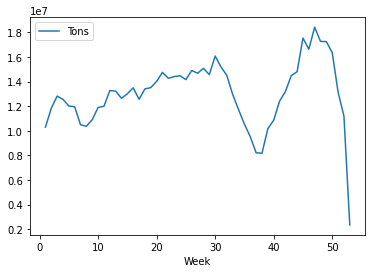

In [ ]:
tonsPerWeek.plot()

In [ ]:
#Generate table with total number of tons per commodity
mostMovedCommodity = df.groupby('Commodity', as_index=True).agg({'Tons': 'sum'})
mostMovedCommodity

,Tons
Commodity,
Corn,420725635.0
Other Grain,8220839.0
Soybeans,223048957.0
Wheat,38194050.0


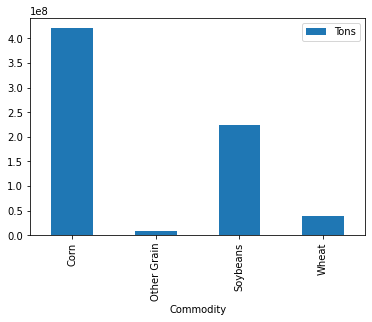

In [ ]:
mostMovedCommodity.pivot_table(
    index="Commodity",
    values="Tons").plot.bar()

In [ ]:
#Tons of Each Commodity Per Week
mostMovedCommodityPerWeek = df.groupby(["Week", "Commodity"])["Tons"].sum()
mostMovedCommodityPerWeek

Week  Commodity  
1     Corn           5239212.0
      Other Grain     195609.0
      Soybeans       4418473.0
      Wheat           433331.0
2     Corn           6110265.0
                       ...    
52    Wheat           361710.0
53    Corn           1280197.0
      Other Grain      14400.0
      Soybeans        978801.0
      Wheat            67154.0
Name: Tons, Length: 212, dtype: float64

In [ ]:
#Tons moved per day
tonsPerDay = df.groupby('Date', as_index=True).agg({'Tons': 'sum'})
tonsPerDay

,Tons
Date,
2003-01-04,619632.0
2003-01-11,817443.0
2003-01-18,1034636.0
2003-01-25,885924.0
2003-02-01,628789.0
...,...
2022-09-03,240500.0
2022-09-10,249727.0
2022-09-17,209600.0


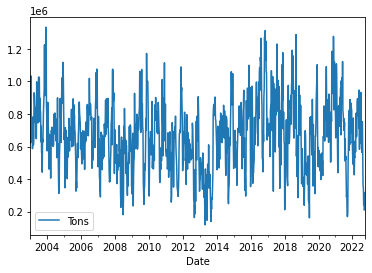

In [ ]:
tonsPerDay.plot.line()

# Examining Air Quality

The air quality data is collected from the Louisiana Department of Environmental Quality.

Website: https://airquality.deq.louisiana.gov/

In [ ]:
air = pd.read_csv("AirQualityHourIntervals.csv")
air

,Date,H2S-PPB,ITEMP-DEGC,METHANE-PPM,NMOC-PPM,PM25-UG/M3,SO2-PPB,THC-PPM,WDIR-DEG,WSP-MPH
0,Jun 27 2020 12:00AM,1.0,24.3,2.11,0.00,16.7,0.0,2.10,142.0,2.0
1,Jun 27 2020 1:00AM,2.0,24.1,2.23,0.00,17.1,0.0,2.21,134.0,3.0
2,Jun 27 2020 2:00AM,1.0,24.1,2.30,0.00,17.3,0.0,2.27,138.0,5.0
3,Jun 27 2020 3:00AM,1.0,24.2,2.31,0.00,15.6,0.0,2.28,139.0,4.0
4,Jun 27 2020 4:00AM,2.0,24.3,2.33,0.00,16.0,0.0,2.30,157.0,3.0
...,...,...,...,...,...,...,...,...,...,...
8573,Jun 21 2021 7:00AM,2.0,27.3,2.15,0.01,8.0,0.2,2.12,153.0,3.0
8574,Jun 21 2021 8:00AM,2.0,27.1,2.16,0.01,11.4,0.2,2.14,200.0,1.0
8575,Jun 21 2021 9:00AM,2.0,27.0,3.98,0.01,8.5,0.3,3.95,230.0,3.0
8576,Jun 21 2021 10:00AM,2.0,27.0,2.16,0.01,11.1,0.3,2.14,182.0,5.0


In [ ]:
air = air.rename(columns={'METHANE-PPM': 'Methane'})

In [ ]:
#convert Date to datetime object
from datetime import datetime 

air['Date'] = pd.to_datetime(air["Date"]).dt.normalize()

In [ ]:
#separate date and time for mean by day calculations
air["date"] = air["Date"].dt.date
air["time"] = air["Date"].dt.time

In [ ]:
#calculate the mean Methane per day 
meanMethanePerDay = air.groupby('Date', as_index=True).agg({'Methane': 'mean'})
meanMethanePerDay.head(20)

,Methane
Date,
2020-06-27,2.120000
2020-06-28,2.984167
2020-06-29,2.861250
2020-06-30,4.554167
2020-07-01,5.987500
2020-07-02,5.587917
2020-07-03,4.071250
2020-07-04,2.914583
2020-07-05,10.277273


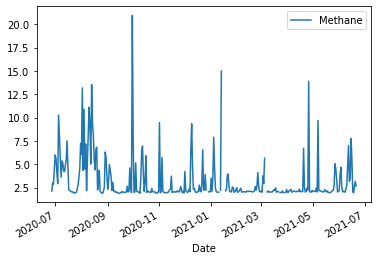

In [ ]:
meanMethanePerDay.plot.line()

# Comparisons

### Methane Gas

Methane, a hydrocarbon, is an extremely potent greenhouse gas that contributes the the effects of climate change. It is 25 times more powerful than CO2 at trapping heat in the atmosphere and is generated by a multitude of sources such as fossil fuel production, transportation, and decay. Not only does it warm the planet at a rapid rate, but it reduces the amount of oxygen in the air contributing to harmful effects for both humans and the environment. It is estimated that exposure to ground-level ozone, which is formed by methane, causes around 1 million premature deaths around the world each year. 

 
https://www.noaa.gov/news-release/increase-in-atmospheric-methane-set-another-record-during-2021#:~:text=Methane%20in%20the%20atmosphere%20is,ruminant%20animals%20such%20as%20cows.

https://www.unep.org/news-and-stories/story/methane-emissions-are-driving-climate-change-heres-how-reduce-them

Started by joining the data of the Mean Methane per day with the tons of barge movements. 

In [ ]:
#join mean methane per day and tons per day into a dataframe so we can graph
methaneTonsPerDayJoin = tonsPerDay.join(meanMethanePerDay, lsuffix="Date", how='outer')

In [ ]:
methaneTonsPerDayJoin

,Tons,Methane
Date,,
2003-01-04,619632.0,NaN
2003-01-11,817443.0,NaN
2003-01-18,1034636.0,NaN
2003-01-25,885924.0,NaN
2003-02-01,628789.0,NaN
...,...,...
2022-09-03,240500.0,NaN
2022-09-10,249727.0,NaN
2022-09-17,209600.0,NaN


In [ ]:
methaneTonsPerDayJoin["Tons"] = tonsPerDay

  
# removing Missing Values
methaneTonsPerDayJoin.dropna(inplace=True)
  
methaneTonsPerDayJoin.head(10)

,Tons,Methane
Date,,
2020-06-27,868840.0,2.120000
2020-07-04,658856.0,2.914583
2020-07-11,824916.0,4.277083
2020-07-18,746792.0,2.190000
2020-07-25,838643.0,1.940000
2020-08-01,890050.0,6.015833
2020-08-08,626068.0,5.404545
2020-08-15,921810.0,8.136667
2020-08-22,921644.0,4.356250


We then scaled the values to provide a better visual comparison between the two variables


In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
meth_scaled = scaler.fit_transform(methaneTonsPerDayJoin.to_numpy())
meth_scaled = pd.DataFrame(meth_scaled, columns=['Tons', 'Methane'])
 
print("Scaled Dataset Using MinMaxScaler")
meth_scaled.head()

Scaled Dataset Using MinMaxScaler


,Tons,Methane
0,0.512689,0.029048
1,0.262174,0.157275
2,0.460287,0.377152
3,0.367083,0.040344
4,0.476663,0.000000


<Figure size 2400x1200 with 0 Axes>

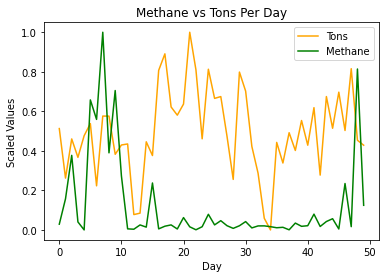

In [ ]:
plt.figure(figsize=(16, 8), dpi=150)
  
# we have passed colors as a list
meth_scaled.plot(label='Methane', color=['orange', 'green'])
  
# adding title
plt.title('Methane vs Tons Per Day')
  
# adding label to x-axis
plt.xlabel('Day')
plt.ylabel('Scaled Values')
  
# adding legend.
plt.legend()

# Models 

We are going to build a linear regression that will take in barge movements and predict the air quality, specifically the amount of methane in the air. This will help us answer one of our primary questions: Do barge movements in the Mississippi affect the air quality in New Orleans?

We are also going to use covariance to summarize the relationship between our quantitative variables: air quality, barge movement, water quality, and wildlife data. This will provide us with directionality to the relationship between the variables to analyze if we have a positive or negative relationship. We can further analyze these results by normalizing the covariance to obtain correlation between them. A covariance matrix may also be useful for our analysis to see all variables relationship at once. 



## For the Future:
We plan to analyze the differences in barge movements with water quality data of the Mississippi River. We are currently working on scraping the USGS website to collect the water quality data and If time allows we hope to find a dataset on wildlife impacts. We plan to incorporate all of these factors in with the air quality data as well to provide a more in depth analysis of the overall system. 